In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
import xgboost
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r"C:\Users\Admin\Downloads\traffic volume.csv")

In [3]:
data.head()

,holiday,temp,rain,snow,weather,date,Time,traffic_volume
0,NaN,288.28,0.0,0.0,Clouds,02-10-2012,9:00:00,5545
1,NaN,289.36,0.0,0.0,Clouds,02-10-2012,10:00:00,4516
2,NaN,289.58,0.0,0.0,Clouds,02-10-2012,11:00:00,4767
3,NaN,290.13,0.0,0.0,Clouds,02-10-2012,12:00:00,5026
4,NaN,291.14,0.0,0.0,Clouds,02-10-2012,13:00:00,4918


In [4]:
data.describe()

,temp,rain,snow,traffic_volume
count,48151.000000,48202.000000,48192.000000,48204.000000
mean,281.205351,0.334278,0.000222,3259.818355
std,13.343675,44.790062,0.008169,1986.860670
min,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1193.000000
50%,282.460000,0.000000,0.000000,3380.000000
75%,291.810000,0.000000,0.000000,4933.000000
max,310.070000,9831.300000,0.510000,7280.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   holiday         61 non-null     object 
 1   temp            48151 non-null  float64
 2   rain            48202 non-null  float64
 3   snow            48192 non-null  float64
 4   weather         48155 non-null  object 
 5   date            48204 non-null  object 
 6   Time            48204 non-null  object 
 7   traffic_volume  48204 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 2.9+ MB


In [6]:
data.isnull().sum()

holiday           48143
temp                 53
rain                  2
snow                 12
weather              49
date                  0
Time                  0
traffic_volume        0
dtype: int64

In [7]:
data['temp'].fillna(data['temp'].mean(),inplace=True)
data['rain'].fillna(data['rain'].mean(),inplace=True)
data['snow'].fillna(data['snow'].mean(),inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_12960\3727727439.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['temp'].fillna(data['temp'].mean(),inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_12960\3727727439.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

In [8]:
print(Counter(data['weather']))

Counter({'Clouds': 15144, 'Clear': 13383, 'Mist': 5942, 'Rain': 5665, 'Snow': 2875, 'Drizzle': 1818, 'Haze': 1359, 'Thunderstorm': 1033, 'Fog': 912, nan: 49, 'Smoke': 20, 'Squall': 4})


In [9]:
data['weather'].fillna('clouds',inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_12960\977435935.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['weather'].fillna('clouds',inplace=True)


In [10]:
data[["day","month","year"]]=data["date"].str.split("-",expand=True)

In [11]:
data[["hours","minutes","seconds"]]=data["Time"].str.split(":",expand=True)

In [12]:
data.head()

,holiday,temp,rain,snow,weather,date,Time,traffic_volume,day,month,year,hours,minutes,seconds
0,NaN,288.28,0.0,0.0,Clouds,02-10-2012,9:00:00,5545,02,10,2012,9,00,00
1,NaN,289.36,0.0,0.0,Clouds,02-10-2012,10:00:00,4516,02,10,2012,10,00,00
2,NaN,289.58,0.0,0.0,Clouds,02-10-2012,11:00:00,4767,02,10,2012,11,00,00
3,NaN,290.13,0.0,0.0,Clouds,02-10-2012,12:00:00,5026,02,10,2012,12,00,00
4,NaN,291.14,0.0,0.0,Clouds,02-10-2012,13:00:00,4918,02,10,2012,13,00,00


In [13]:
data.describe()

,temp,rain,snow,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205351,0.334278,0.000222,3259.818355
std,13.336338,44.789133,0.008168,1986.860670
min,0.000000,0.000000,0.000000,0.000000
25%,272.180000,0.000000,0.000000,1193.000000
50%,282.429000,0.000000,0.000000,3380.000000
75%,291.800000,0.000000,0.000000,4933.000000
max,310.070000,9831.300000,0.510000,7280.000000


In [14]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
data['weather']=le.fit_transform(data['weather'])

In [15]:
from sklearn.preprocessing import LabelEncoder

# Encode non-numeric columns
for col in data.select_dtypes(include=['object']).columns:
    data[col] = LabelEncoder().fit_transform(data[col].astype(str))

# Then compute correlation


In [16]:
cor=data.corr()

<Axes: >

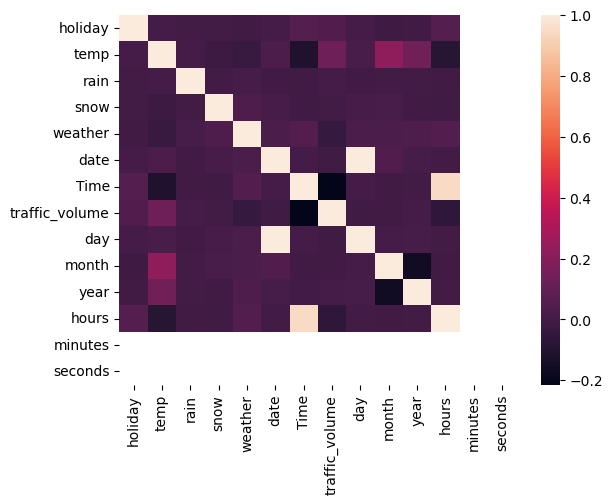

In [17]:
sns.heatmap(cor)

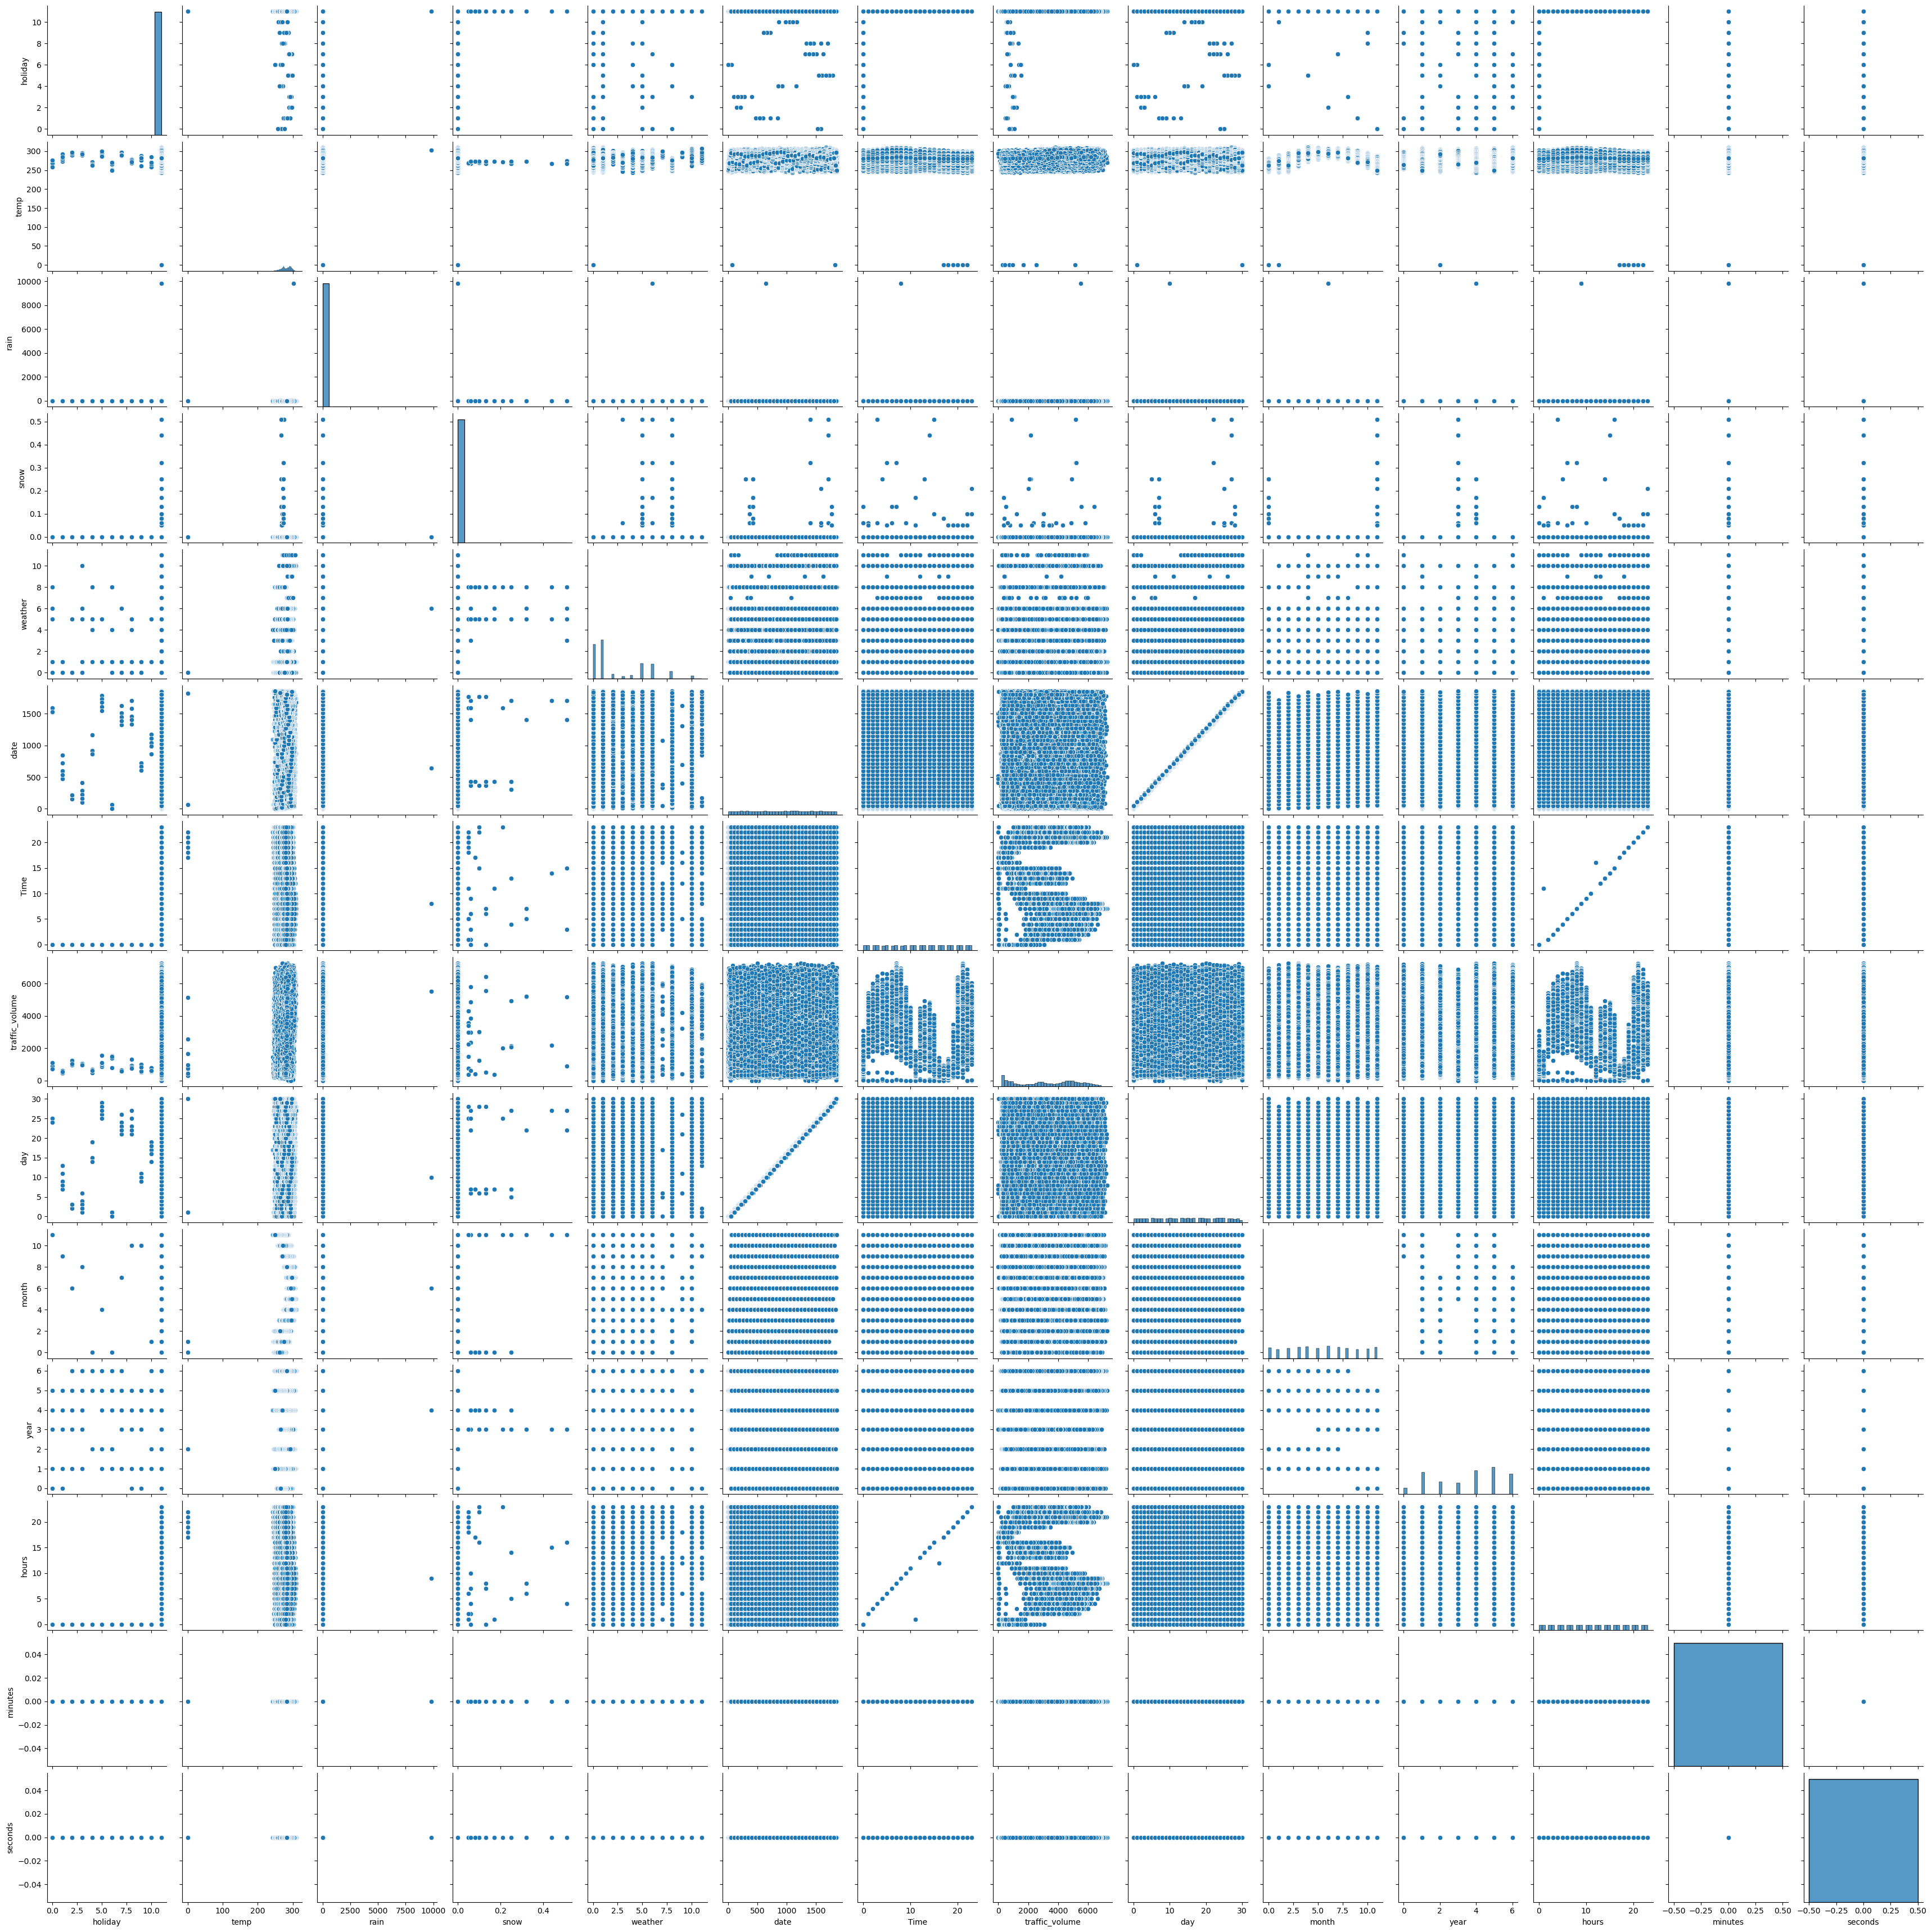

In [18]:
sns.pairplot(data)



<Axes: >

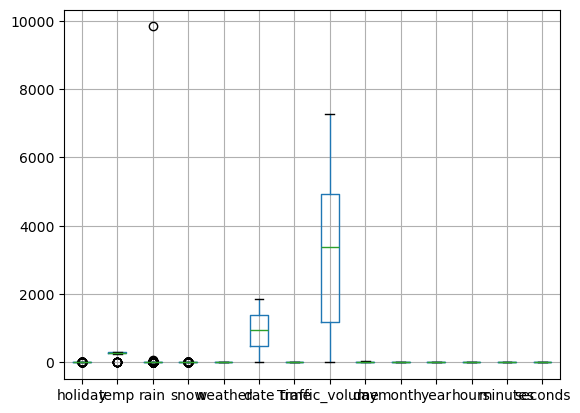

In [19]:
data.boxplot()

In [20]:
data.drop(columns=["date","Time"],axis=1,inplace=True)

In [21]:
data.head()

,holiday,temp,rain,snow,weather,traffic_volume,day,month,year,hours,minutes,seconds
0,11,288.28,0.0,0.0,1,5545,1,9,0,23,0,0
1,11,289.36,0.0,0.0,1,4516,1,9,0,2,0,0
2,11,289.58,0.0,0.0,1,4767,1,9,0,3,0,0
3,11,290.13,0.0,0.0,1,5026,1,9,0,4,0,0
4,11,291.14,0.0,0.0,1,4918,1,9,0,5,0,0


In [22]:
y=data['traffic_volume']
x=data.drop(columns=['traffic_volume'],axis=1)

In [23]:
x.shape
y.shape

(48204,)

In [24]:
names=x.columns

In [25]:
from sklearn.preprocessing import scale

In [26]:
data['holiday']=le.fit_transform(data['holiday'])

In [27]:
x=scale(x)

In [28]:
x=pd.DataFrame(x,columns=names)

In [29]:
x.head()

,holiday,temp,rain,snow,weather,day,month,year,hours,minutes,seconds
0,0.031687,0.530485,-0.007463,-0.027235,-0.567564,-1.574903,1.02758,-1.855294,1.638872,0.0,0.0
1,0.031687,0.611467,-0.007463,-0.027235,-0.567564,-1.574903,1.02758,-1.855294,-1.376863,0.0,0.0
2,0.031687,0.627964,-0.007463,-0.027235,-0.567564,-1.574903,1.02758,-1.855294,-1.233257,0.0,0.0
3,0.031687,0.669205,-0.007463,-0.027235,-0.567564,-1.574903,1.02758,-1.855294,-1.089650,0.0,0.0
4,0.031687,0.744939,-0.007463,-0.027235,-0.567564,-1.574903,1.02758,-1.855294,-0.946044,0.0,0.0


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [32]:
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
import xgboost

In [33]:
lin_reg=linear_model.LinearRegression()
Dtree=tree.DecisionTreeRegressor()
Rand=ensemble.RandomForestRegressor()
svr=svm.SVR()
XGB=xgboost.XGBRFRegressor()

In [34]:
lin_reg.fit(x_train,y_train)
Dtree.fit(x_train,y_train)
Rand.fit(x_train,y_train)
svr.fit(x_train,y_train)
XGB.fit(x_train,y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, feature_weights=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, ...)

In [35]:
p1=lin_reg.predict(x_train)
p2=Dtree.predict(x_train)
p3=Rand.predict(x_train)
p4=svr.predict(x_train)
p5=XGB.predict(x_train)

In [38]:
from sklearn import metrics

In [39]:
print(metrics.r2_score(p1,y_train))
print(metrics.r2_score(p2,y_train))
print(metrics.r2_score(p3,y_train))
print(metrics.r2_score(p4,y_train))
print(metrics.r2_score(p5,y_train))

-41.18352197334788
1.0
0.9740760585983844
-17.734763734781716
0.6232450008392334


In [40]:
p1=lin_reg.predict(x_test)
p2=Dtree.predict(x_test)
p3=Rand.predict(x_test)
p4=svr.predict(x_test)
p5=XGB.predict(x_test)

In [41]:
print(metrics.r2_score(p1,y_test))
print(metrics.r2_score(p2,y_test))
print(metrics.r2_score(p3,y_test))
print(metrics.r2_score(p4,y_test))
print(metrics.r2_score(p5,y_test))

-39.18351757202102
0.6806862173859598
0.7972421692423162
-17.411147726036987
0.631929337978363


In [42]:
MSE=metrics.mean_squared_error(p3,y_test)

In [43]:
np.sqrt(MSE)

811.0705077465723

In [45]:
import pickle

In [46]:
pickle.dump(Rand,open("model.pkl",'wb'))
pickle.dump(le,open("encoder.pkl",'wb'))

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x = pd.DataFrame(x_scaled, columns=names)

# Now split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Fit model
Rand.fit(x_train, y_train)

# Save model & scaler
pickle.dump(Rand, open("model.pkl", 'wb'))
pickle.dump(scaler, open("scaler.pkl", 'wb'))


In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pickle

# Create scaler and scale data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x = pd.DataFrame(x_scaled, columns=names)

# Now split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Train model
from sklearn.ensemble import RandomForestRegressor
Rand = RandomForestRegressor()
Rand.fit(x_train, y_train)

# Save model and scaler
pickle.dump(Rand, open("model.pkl", 'wb'))
pickle.dump(scaler, open("scaler.pkl", 'wb'))

# Print feature names for confirmation
print(scaler.feature_names_in_)


['holiday' 'temp' 'rain' 'snow' 'weather' 'day' 'month' 'year' 'hours'
 'minutes' 'seconds']


In [50]:
print(metrics.r2_score(y_test, Rand.predict(x_test)))


0.8326770901559029
